## Devashri Narendra Chauhan
## Task-6 Prediction using Decision Tree Classifier

**Importing the required libraries**


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Importing the dataset**

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris=load_iris()

In [41]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [42]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [45]:
#describing the statistics for the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
#finding the null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [47]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=76)

In [48]:
x_train

array([[6. , 2.7, 5.1, 1.6],
       [6.6, 3. , 4.4, 1.4],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 2.9, 5.6, 1.8],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [5.7, 2.8, 4.1, 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [6.4, 2.8, 5.6, 2.2],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.2, 4. , 1. ],
       [5. , 3. , 1.6, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6.1, 2.8, 4. , 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3. , 5.2, 2.3],
       [5.7, 2.9, 4.2, 1.3],
       [4.7, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5. , 3.6, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.9, 3.1, 4.9, 1.5],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 2

In [49]:
y_train

array([1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2,
       1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2])

In [50]:
x_test

array([[5.1, 3.8, 1.6, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.2, 4.1, 1.5, 0.1],
       [7.1, 3. , 5.9, 2.1],
       [6.5, 3. , 5.8, 2.2],
       [5.7, 2.8, 4.5, 1.3],
       [4.3, 3. , 1.1, 0.1],
       [6.3, 2.5, 4.9, 1.5],
       [5.9, 3. , 4.2, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.5, 4.2, 1.4, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.3, 2.3, 4.4, 1.3],
       [6. , 3.4, 4.5, 1.6],
       [5.7, 3.8, 1.7, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [4.6, 3.2, 1.4, 0.2],
       [7.2, 3.2, 6. , 1.8],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.6, 1. , 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.9, 1.7, 0.4],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [6.8, 2.8, 4.8, 1.4],
       [5.1, 3.3, 1.7, 0.5],
       [7. , 3.2, 4.7, 1.4],
       [6.8, 3.2, 5.9, 2.3],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.9, 4.3, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [6.1, 3

In [51]:
y_test

array([0, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0,
       0])

**Building the Decision Tree**

In [52]:
#importing the classifier
#fitting the model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

**Predicting the values**

In [53]:
#predicting the values
y_pred=dtc.predict(x_test)
y_pred

array([0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0,
       0])

**Evaluating model Performance and accuracy**

In [54]:
#importing accuracy metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [55]:
#evaluating confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[19,  0,  0],
       [ 0, 10,  3],
       [ 0,  2, 11]], dtype=int64)

In [56]:
#finding accuracy
acc=accuracy_score(y_test,y_pred)
acc

0.8888888888888888

In [57]:
#presenting classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       0.83      0.77      0.80        13\n           2       0.79      0.85      0.81        13\n\n    accuracy                           0.89        45\n   macro avg       0.87      0.87      0.87        45\nweighted avg       0.89      0.89      0.89        45\n'

**Visualizing the Decision Tree**

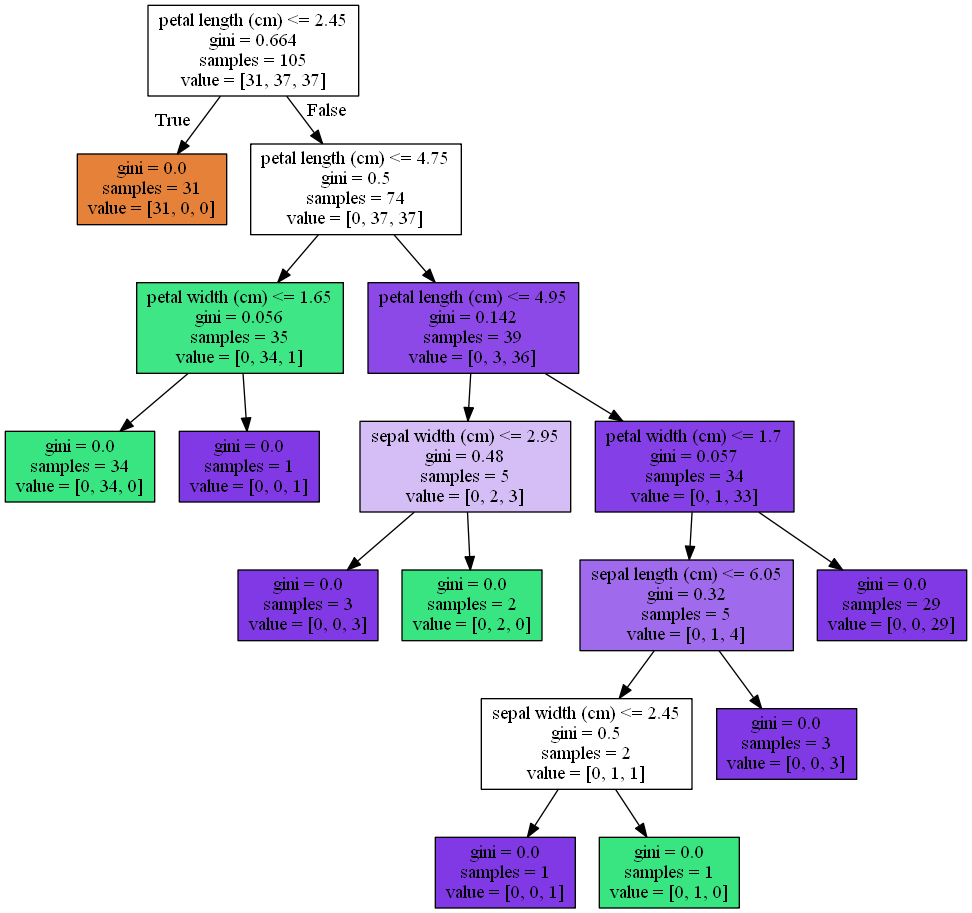

In [58]:
#Visualizing the decision tree using Gini index
from sklearn import tree
dot_data=tree.export_graphviz(dtc,out_file=None,feature_names=df.columns,filled=True)
import pydotplus as py
graph=py.graph_from_dot_data(dot_data)
from IPython.display import Image
Image(graph.create_png())